<a href="https://colab.research.google.com/github/Carlos-Okada/Portifolio-/blob/main/Analisando_os_Dados_do_Airbnb_(Barcelona).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2021-10-10/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.
Abaixo segue uma seguencia de legendas para facilitar o entendimento.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name`- nome da propriedade anunciada 
* `host_id`número de id do proprietário (anfitrião) da propriedade
* `host_name`- Nome do anfitrião 
* `neighbourhood_group`- esta coluna não contém nenhum valor valido
* `neighbourhood`- nome do bairro
* `latitude`- coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type`- informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nigths`- quantidade mínima de noites para reservar
* `number_of_reviews`- número de reviews que a propriedade possui
* `last_review`- data do último review
* `reviews_per_month`- quantidade de review por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365`- númeor de dias de disponibilidade dentro de 365 dias 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,121,1,21,2019-10-11,0.23,19,47,0,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,4,52,2019-12-15,0.74,2,86,0,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.60,3,85,0,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,181,4,156,2020-03-11,1.55,2,136,7,HUTB-001506
4,35379,Double 04 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39036,2.15274,Private room,41,2,358,2021-07-21,4.01,4,193,41,Exempt


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que noss conjunto de dados possui e ver os tipos de cada coluna.

Esse *dataset* é uma versão "resumida" do Airbnb. Existe uma versão mais completa com o arquivo (`listings.csv.gz`)

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 16055
Variaveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.359888
reviews_per_month                 0.266770
last_review                       0.266770
host_name                         0.002554
name                              0.000623
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

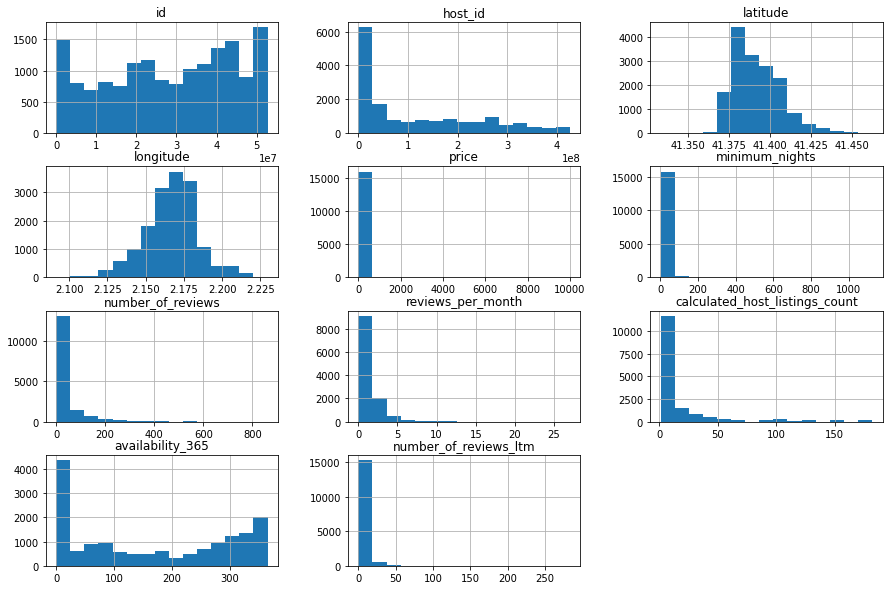

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
##  *A média de preço para a cidade de barcelona*
 

In [ ]:
# ver a média da coluna `price``
df.price.mean()
print('A média diaria para a cidade de Barcelona é:{: 2f}€'.format(df.price.mean()))

A média diaria para a cidade de Barcelona é: 112.467331€


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16055.000000,16055.000000,16055.000000,11772.000000,16055.000000,16055.000000
mean,112.467331,12.970103,34.153348,1.164569,17.319028,164.437745
std,325.455790,31.696885,67.383300,1.439324,33.352697,136.654295
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,0.000000,0.180000,1.000000,8.000000
50%,70.000000,3.000000,5.000000,0.700000,3.000000,153.000000
75%,125.000000,30.000000,35.000000,1.670000,16.000000,306.000000
max,9999.000000,1124.000000,862.000000,27.000000,182.000000,365.000000


Olhando o resumo estatístico acima, podemos confirrmar algumas hipóteses como:
* A variável `price`possui 75% do valor abaixo de 125, porém seu vamor máximo é 9999.
* A quantidade maxíma de noites (`minimum_nights`) está acima de 365 dias no ano




In [ ]:
# plotar um heatmap a partir das correlações
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)    




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.027132,-0.002914,-0.015670,0.032977,0.067545
minimum_nights,0.027132,1.000000,-0.122953,-0.152646,0.041881,0.089835
number_of_reviews,-0.002914,-0.122953,1.000000,0.554931,-0.113233,0.046934
reviews_per_month,-0.015670,-0.152646,0.554931,1.000000,-0.053146,0.101292
calculated_host_listings_count,0.032977,0.041881,-0.113233,-0.053146,1.000000,0.178624
availability_365,0.067545,0.089835,0.046934,0.101292,0.178624,1.000000


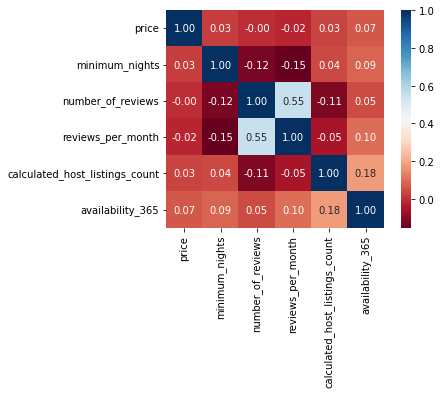

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamento/casas interias, apenas o aluguel do quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_count()`


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8695
Private room       6939
Hotel room          230
Shared room         191
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] 

Entire home/apt    0.541576
Private room       0.432202
Hotel room         0.014326
Shared room        0.011897
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Barcelona?**

Uma maneira de verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (nieghbourhoods) a partir do preço de locação 




In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
les Corts                                       431.410138
la Font d'en Fargues                            240.928571
Diagonal Mar i el Front Marítim del Poblenou    207.610294
la Vila Olímpica del Poblenou                   169.923077
la Dreta de l'Eixample                          166.819048
Vallvidrera, el Tibidabo i les Planes           164.740741
Sarrià                                          157.421053
Sant Gervasi - Galvany                          150.085911
el Besòs i el Maresme                           142.409524
el Parc i la Llacuna del Poblenou               141.162562
Name: price, dtype: float64

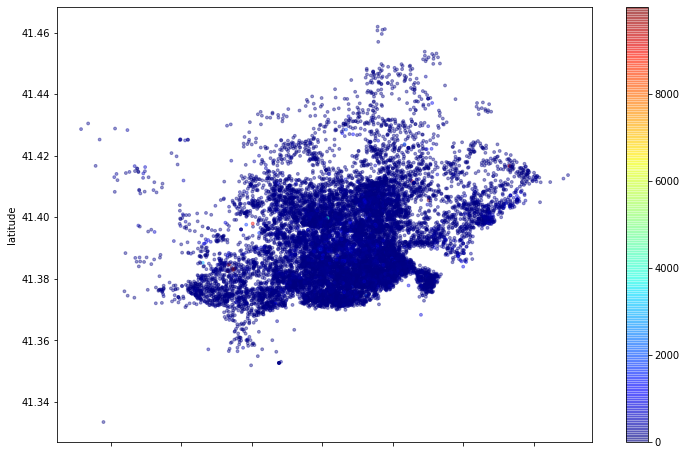

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

12.970102771722205

## Conclusões


 Apesar de ter sido feita um análise superficial com dados resumidos do Airbnb, 
oque eu quiz mostrar nesse primeiro projeto é como conseguimos extrair dados a partir de uma análise exploratória, como possuir preço medio, media de noites, bairros mais caros e muito mais coisas, que pode ajudar as que estão pensando em viajar para essa localidade.




